# IPL Score Prediction using Machine Learning

## Dataset Link (kaggle)
https://www.kaggle.com/datasets/dgsports/ipl-ball-by-ball-2008-to-2022?select=IPL_ball_by_ball_updated.csv

In [1]:
import pandas as pd
import numpy as np
ipl_data1=pd.read_csv("ipl_data.csv")

In [2]:
ipl_data1.head()

,match_id,year,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,venue
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN,"M Chinnaswamy Stadium, Bengaluru"
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,"M Chinnaswamy Stadium, Bengaluru"
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN,"M Chinnaswamy Stadium, Bengaluru"
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,"M Chinnaswamy Stadium, Bengaluru"
4,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN,"M Chinnaswamy Stadium, Bengaluru"


# Pre-Process on Dataset

In [3]:
#Remove a 2nd inning data
data= ipl_data1[ipl_data1['inning'] != 2]

In [4]:
#drop unwanted columns
df=data.drop(columns=['batter', 'bowler', 'non_striker', 'batsman_runs', 'extra_runs', 'extras_type', 'player_dismissed', 'dismissal_kind', 'fielder'])

In [5]:
#calculate overs like 6.5,8.2
df['overs'] = df['over'] + df['ball'] / 10

In [6]:
df['runs'] = df.groupby('match_id')['total_runs'].cumsum()

In [7]:
df['wickets'] = df.groupby('match_id')['is_wicket'].cumsum()

In [8]:
#calculate run rate
df['run_rat'] = (df['runs'] / ((df['over'].astype(int) * 6 + df['ball'].astype(int)) / 6))

In [9]:
#drop a unwanted columns
df = df.drop(columns=['over', 'ball'])

In [10]:
#add a colums total its gives last score of the innings
df['total'] = df.groupby('match_id')['runs'].transform('last')

In [11]:
df['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Kolkata Knight Riders', 'Rajasthan Royals',
       'Mumbai Indians', 'Chennai Super Kings', 'Deccan Chargers',
       'Pune Warriors', 'Kochi Tuskers Kerala', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Gujarat Titans', 'Lucknow Super Giants'], dtype=object)

In [12]:
# Removing duplicate teams names
team_mapping = {
    'Gujarat Lions': 'Gujarat Titans',
    'Punjab Kings':'Kings XI Punjab',
    'Royal Challengers Bangalore':'Royal Challengers Bengaluru',
    'Deccan Chargers':'Sunrisers Hyderabad',
    'Delhi Daredevils':'Delhi Capitals'
}
df['batting_team']= df['batting_team'].replace(team_mapping)
df['bowling_team']= df['bowling_team'].replace(team_mapping)

In [13]:
df['batting_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bengaluru', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Lucknow Super Giants'],
      dtype=object)

In [14]:
df.head(10)

,match_id,year,inning,batting_team,bowling_team,total_runs,is_wicket,venue,overs,runs,wickets,run_rat,total
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,"M Chinnaswamy Stadium, Bengaluru",0.1,1,0,6.000000,222
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,0,"M Chinnaswamy Stadium, Bengaluru",0.2,1,0,3.000000,222
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,"M Chinnaswamy Stadium, Bengaluru",0.3,2,0,4.000000,222
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,0,"M Chinnaswamy Stadium, Bengaluru",0.4,2,0,3.000000,222
4,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,0,"M Chinnaswamy Stadium, Bengaluru",0.5,2,0,2.400000,222
5,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,0,"M Chinnaswamy Stadium, Bengaluru",0.6,2,0,2.000000,222
6,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,1,0,"M Chinnaswamy Stadium, Bengaluru",0.7,3,0,2.571429,222
7,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,0,0,"M Chinnaswamy Stadium, Bengaluru",1.1,3,0,2.571429,222
8,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,4,0,"M Chinnaswamy Stadium, Bengaluru",1.2,7,0,5.250000,222
9,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,4,0,"M Chinnaswamy Stadium, Bengaluru",1.3,11,0,7.333333,222


In [15]:
#calculate runs_last_5 , wickets_last_5
df['runs_last_5'] = df.groupby('match_id')['total_runs'].apply(lambda x: x.rolling(window=30, min_periods=1).sum()).reset_index(level=0, drop=True).astype(int)
df['wickets_last_5'] = df.groupby('match_id')['is_wicket'].apply(lambda x: x.rolling(window=30, min_periods=1).sum()).reset_index(level=0, drop=True).astype(int)

In [16]:
#drop unwanted columns
df = df.drop(columns=['total_runs','is_wicket'])

In [17]:
df.head()

,match_id,year,inning,batting_team,bowling_team,venue,overs,runs,wickets,run_rat,total,runs_last_5,wickets_last_5
0,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",0.1,1,0,6.0,222,1,0
1,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",0.2,1,0,3.0,222,1,0
2,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",0.3,2,0,4.0,222,2,0
3,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",0.4,2,0,3.0,222,2,0
4,335982,2008,1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",0.5,2,0,2.4,222,2,0


In [18]:
#Rename of columns
df = df.rename(columns={'batting_team': 'bat_team', 'bowling_team': 'bowl_team'})

#Re-ordering the colums

In [19]:
df=df[['match_id','year','bat_team','bowl_team','venue','runs',	'wickets','overs','run_rat','runs_last_5','wickets_last_5','total']]

In [20]:
ipl_df=pd.DataFrame(df)
ipl_df.head()

,match_id,year,bat_team,bowl_team,venue,runs,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
0,335982,2008,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",1,0,0.1,6.0,1,0,222
1,335982,2008,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",1,0,0.2,3.0,1,0,222
2,335982,2008,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.3,4.0,2,0,222
3,335982,2008,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.4,3.0,2,0,222
4,335982,2008,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.5,2.4,2,0,222


# Exploratory Data Analysis

In [21]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 126286 entries, 0 to 243722
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   match_id        126286 non-null  int64  
 1   year            126286 non-null  int64  
 2   bat_team        126286 non-null  object 
 3   bowl_team       126286 non-null  object 
 4   venue           126286 non-null  object 
 5   runs            126286 non-null  int64  
 6   wickets         126286 non-null  int64  
 7   overs           126286 non-null  float64
 8   run_rat         126286 non-null  float64
 9   runs_last_5     126286 non-null  int64  
 10  wickets_last_5  126286 non-null  int64  
 11  total           126286 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 12.5+ MB


In [22]:
ipl_df[['wickets', 'overs', 'run_rat', 'runs_last_5', 'wickets_last_5', 'total']].describe()

,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
count,126286.000000,126286.000000,126286.000000,126286.000000,126286.000000,126286.000000
mean,2.415280,9.800522,7.897955,34.003072,1.129175,164.903592
std,2.035888,5.781271,19.173687,15.220634,1.063691,30.368664
min,0.000000,0.100000,0.000000,0.000000,0.000000,56.000000
25%,1.000000,4.600000,6.151899,25.000000,0.000000,145.000000
50%,2.000000,9.600000,7.428571,35.000000,1.000000,165.000000
75%,4.000000,14.600000,8.582278,44.000000,2.000000,185.000000
max,11.000000,20.000000,1254.000000,113.000000,7.000000,263.000000


In [23]:
ipl_df[['match_id', 'year', 'bat_team', 'bowl_team', 'venue']].nunique()

match_id     1024
year           16
bat_team       14
bowl_team      14
venue          42
dtype: int64

In [24]:
ipl_df['year'].unique()

array([2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020, 2021, 2022, 2023])

In [25]:
#import library
import seaborn as sns
import matplotlib.pyplot as plt

- Plot heatmap of the correlation matrix

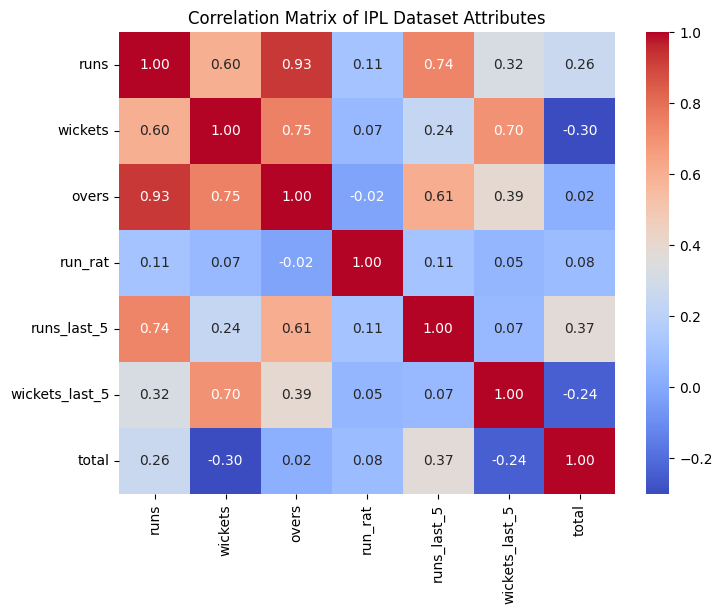

Attribute with highest correlation with 'total': runs_last_5
Correlation value: 0.37


In [26]:
corr_matrix = ipl_df[['runs', 'wickets', 'overs','run_rat', 'runs_last_5', 'wickets_last_5', 'total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of IPL Dataset Attributes')
plt.show()

total_corr = corr_matrix['total']

# Find the highest correlation with 'total'
highest_corr = total_corr.drop(labels='total')  # Drop the 'total' correlation with itself
max_corr_attr = highest_corr.idxmax()
max_corr_value = highest_corr.max()

print(f"Attribute with highest correlation with 'total': {max_corr_attr}")
print(f"Correlation value: {max_corr_value:.2f}")

- Average runs per year for perticular team

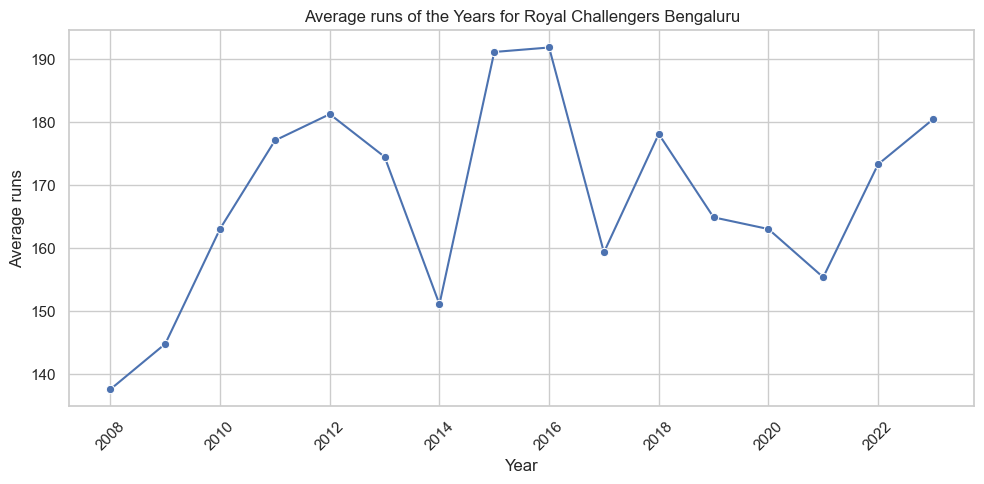

In [27]:
team_name = input("Enter the team name: ")
team_df = ipl_df[ipl_df['bat_team'] == team_name]
# # Calculate average wickets per year
average_runs_per_year =team_df.groupby('year')['total'].mean().reset_index()
mode_runs_per_year = team_df.groupby('year')['total'].agg(lambda x: x.mode()[0]).reset_index()
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(10, 5))
sns.lineplot(x='year', y='total', data=average_runs_per_year, marker='o', color='b')
plt.title(f'Average runs of the Years for {team_name}')
plt.xlabel('Year')
plt.ylabel('Average runs')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

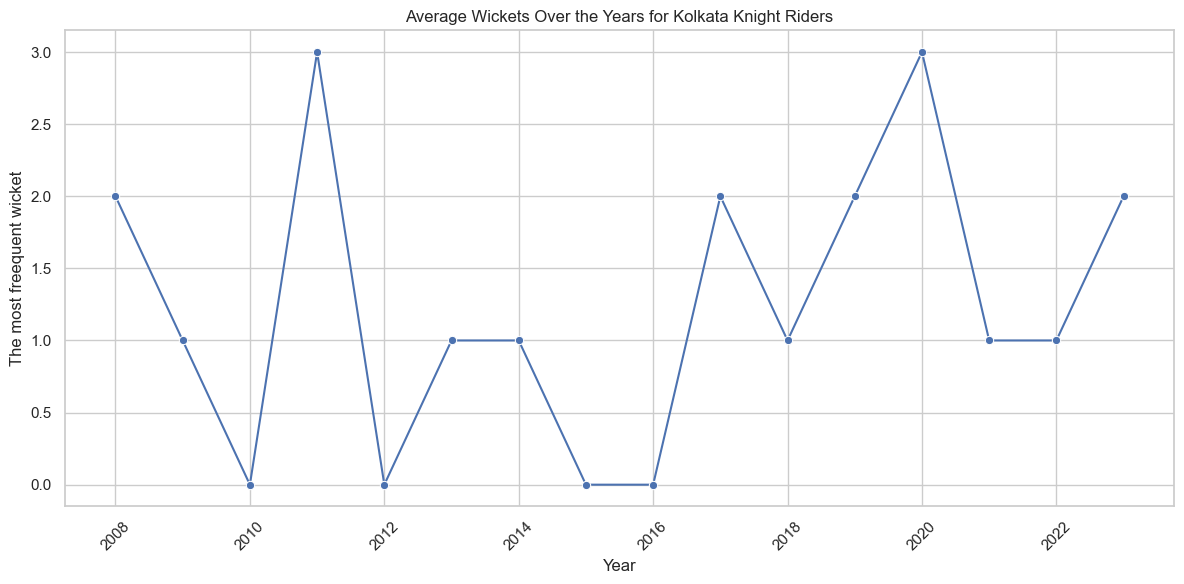

In [28]:
team_name = input("Enter the team name: ")

# Filter the DataFrame based on the input team name
team_df = ipl_df[ipl_df['bat_team'] == team_name]

# Calculate average wickets per year
average_wickets_per_year = team_df.groupby('year')['wickets'].agg(lambda x: x.mode()[0]).reset_index()

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='wickets', data=average_wickets_per_year, marker='o', color='b')
plt.title(f'Average Wickets Over the Years for {team_name}')
plt.xlabel('Year')
plt.ylabel('The most freequent wicket')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

- Pie chart : Percentage of Matches Played by Each Team

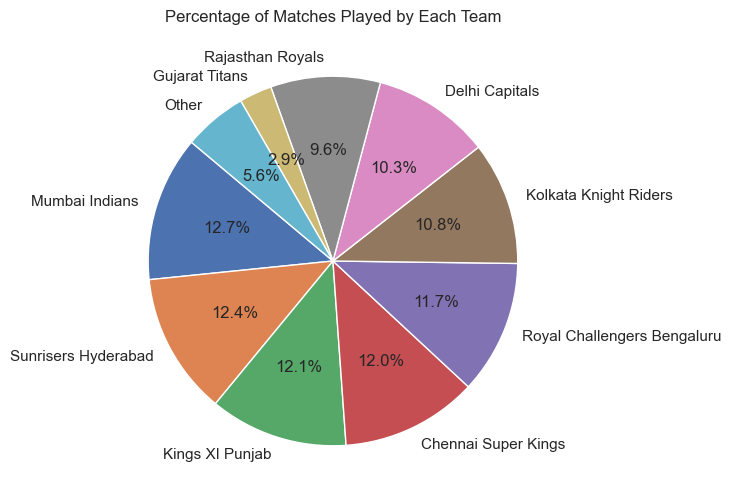

In [29]:
# Count matches played by each team
matches_per_team = ipl_df['bat_team'].value_counts(normalize=True) * 100

# Group teams with less than 2% into 'Other'
matches_per_team['Other'] = matches_per_team[matches_per_team < 2].sum()
matches_per_team = matches_per_team[matches_per_team >= 2]

# Plot the pie chart
matches_per_team.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(6, 6))
plt.title('Percentage of Matches Played by Each Team')
plt.ylabel('')  # Hide the y-label
plt.show()

##### Insights :

- Kolkata Knight Riders: 10.8%
- Chennai Super Kings: 12.0%
- Rajasthan Royals: 9.6%
- Mumbai Indians: 12.7%
- Kings XI Punjab: 12.1%
- Royal Challengers Bengaluru: 11.7%
- Delhi Capitals: 10.3%
- Sunrisers Hyderabad: 12.4%
- Gujarat Titans: 2.9%

- For more accurate first innings score predictions, focus on the teams with higher percentages, as they have shown consistent participation in IPL matches

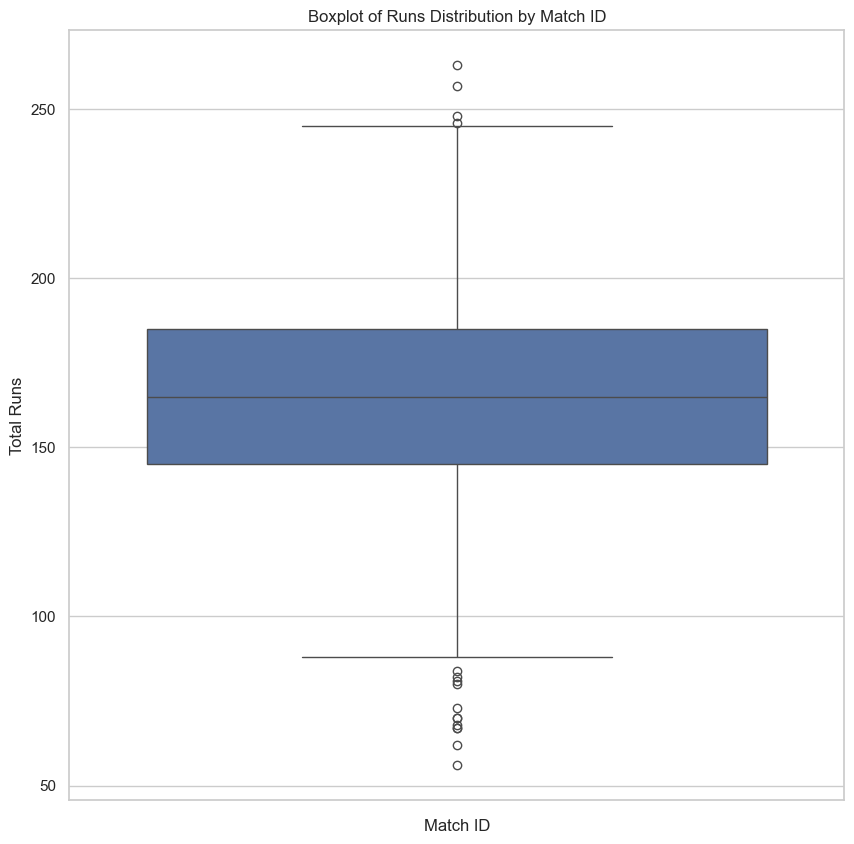

In [30]:
match_totals = df.groupby('match_id')['total'].max().reset_index()
plt.figure(figsize=(10, 10))
sns.boxplot(y='total', data=match_totals)
plt.title('Boxplot of Runs Distribution by Match ID')
plt.ylabel('Total Runs')
plt.xlabel('Match ID')  #displayed as a single category on the x-axis
plt.show()

##### **Median Runs**: The median score is around 170 runs. This suggests that half of the matches had a total score below 170 and the other half had scores above 170.

##### **Interquartile Range (IQR)**: Most scores are between about 130 and 180 runs.

##### **Outliers**: There are a few matches with low total runs (below 100 runs) and some with high total runs (above 220 runs)



- Plot min, max, and average scores Each Team

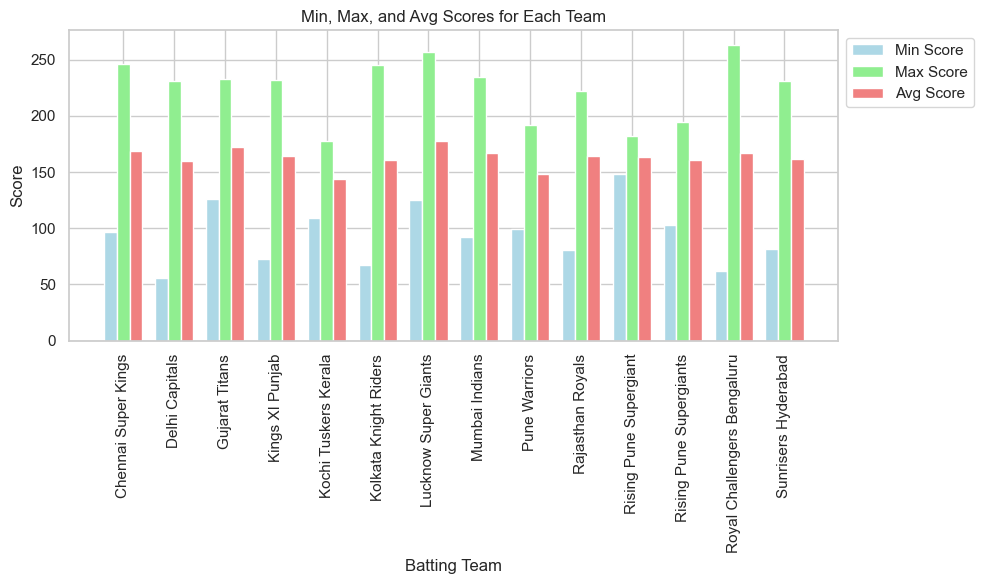

In [31]:
import pandas as pd
import matplotlib.pyplot as plt


# Drop duplicates to get unique scores for each team per match
df_unique = ipl_df.drop_duplicates(subset=['match_id', 'bat_team', 'total'])

# Group by match_id and bat_team, and get the total score for each
df_grouped = df_unique.groupby(['match_id', 'bat_team'])['total'].max().reset_index()

# Calculate statistics
stats = df_grouped.groupby('bat_team')['total'].agg(['min', 'max', 'mean']).reset_index()

# Plot the statistics
fig, ax = plt.subplots(figsize=(10, 6))

# Plotting min, max, and average scores
bar_width = 0.25
index = range(len(stats))

plt.bar(index, stats['min'], bar_width, label='Min Score', color='lightblue')
plt.bar([i + bar_width for i in index], stats['max'], bar_width, label='Max Score', color='lightgreen')
plt.bar([i + bar_width*2 for i in index], stats['mean'], bar_width, label='Avg Score', color='lightcoral')

plt.xlabel('Batting Team')
plt.ylabel('Score')
plt.title('Min, Max, and Avg Scores for Each Team')
plt.xticks([i + bar_width for i in index], stats['bat_team'], rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


- Teams like CSK, KKR, and Mumbai Indians are generally high-performing with strong average scores and high maximum scores.
- Teams like Kochi Tuskers Kerala and Pune Warriors show weaker performance with lower scores across all metrics.
- Teams like RCB and Sunrisers Hyderabad have high potential (with high maximum scores) but also display significant variability, as indicated by their lower minimum scores.

##### venue statistics

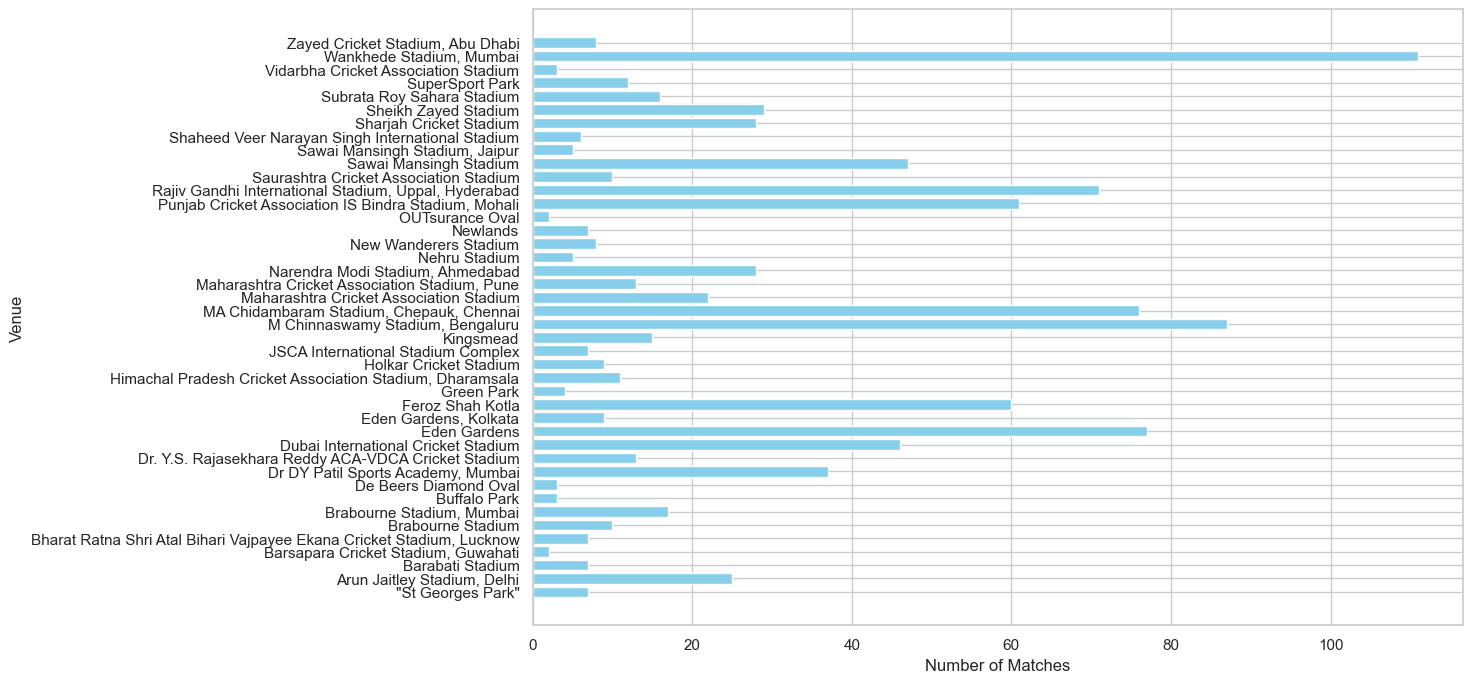

In [32]:
# Group by venue and count unique match IDs# Group by venue and count unique match IDs
venue_match_counts = data.groupby('venue')['match_id'].nunique().reset_index()
venue_match_counts.columns = ['venue', 'number_of_matches']

venue_match_counts = data.groupby('venue')['match_id'].nunique().reset_index()
venue_match_counts.columns = ['venue', 'number_of_matches']

plt.figure(figsize=(12, 8))
plt.barh(venue_match_counts['venue'], venue_match_counts['number_of_matches'], color='skyblue')
plt.xlabel('Number of Matches')
plt.ylabel('Venue')
plt.show()

##### Top Venues:
- Wankhede Stadium, Mumbai:the highest number of matches, making it one of the most significant venues in the IPL.
- MA Chidambaram Stadium, Chennai: Another key venue with a high number of matches, known for its spin-friendly pitches.
- M Chinnaswamy Stadium, Bengaluru: with many matches, known for high-scoring games due to its batting-friendly conditions.

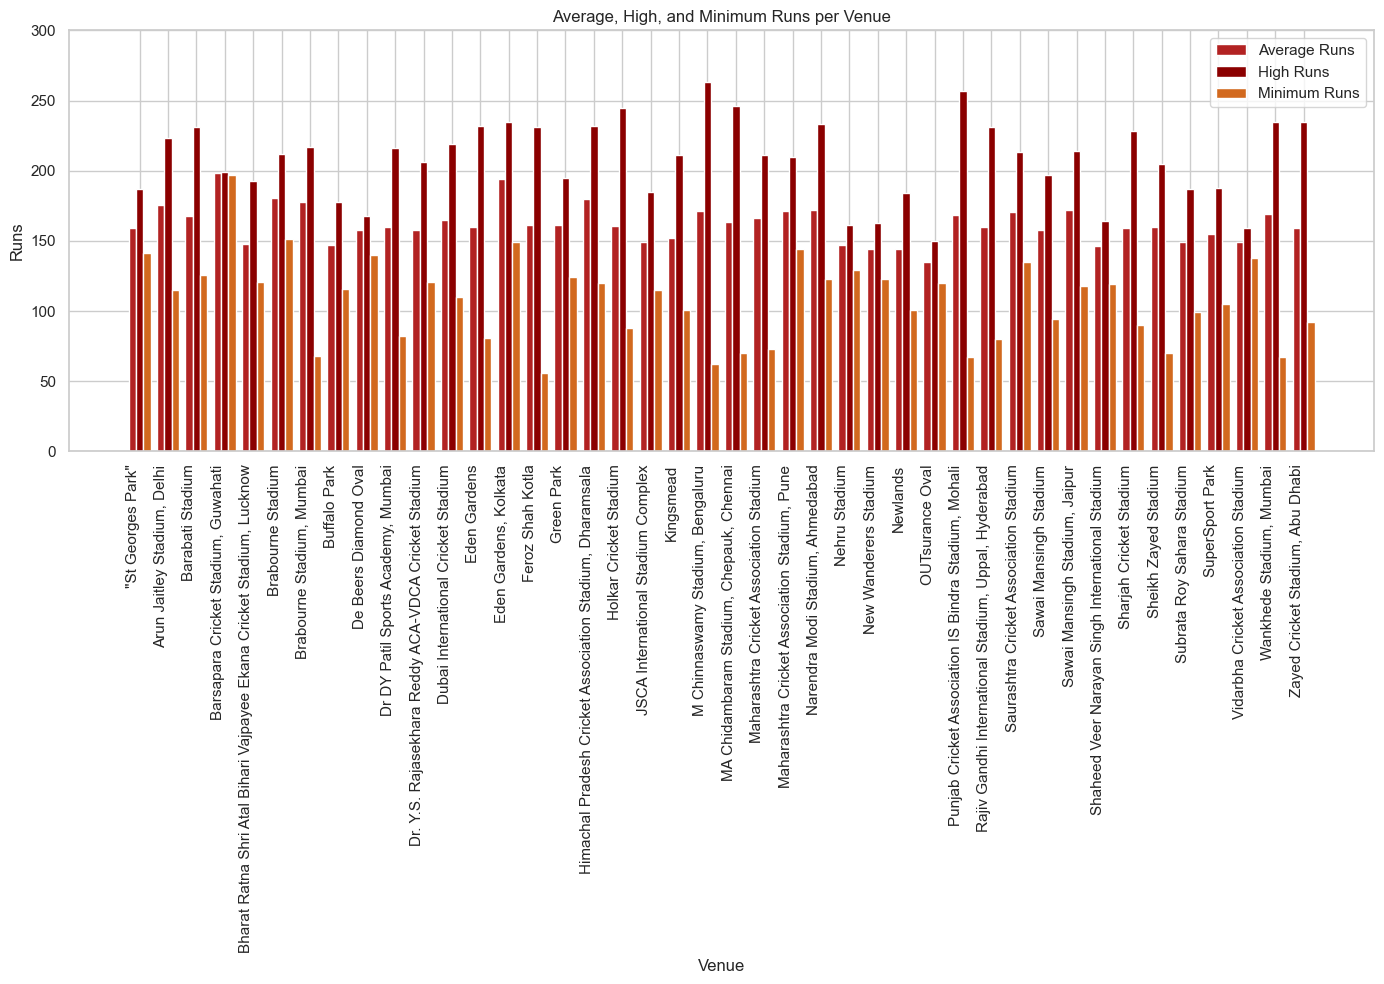

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Drop duplicate rows for each match_id and venue, keeping only the first occurrence
unique_totals = ipl_df.drop_duplicates(subset=['match_id', 'venue'], keep='first')

# Group by venue and calculate aggregate statistics
venue_stats = unique_totals.groupby('venue')['total'].agg(['mean', 'max', 'min']).reset_index()
venue_stats.columns = ['venue', 'average_runs', 'high_runs', 'minimum_runs']

# Plot the combined graph
plt.figure(figsize=(14, 10))

# Define the number of venues
num_venues = len(venue_stats)
bar_width = 0.26  # Width of each bar
index = np.arange(num_venues)  # The label locations

# Plot bars for each statistic
plt.bar(index - bar_width, venue_stats['average_runs'], bar_width, label='Average Runs', color='firebrick')
plt.bar(index, venue_stats['high_runs'], bar_width, label='High Runs', color='darkred')
plt.bar(index + bar_width, venue_stats['minimum_runs'], bar_width, label='Minimum Runs', color='chocolate')

# Add labels and title
plt.xlabel('Venue')
plt.ylabel('Runs')
plt.title('Average, High, and Minimum Runs per Venue')

# Customizing the y-axis ticks
plt.yticks(np.arange(0, venue_stats[['average_runs', 'high_runs', 'minimum_runs']].max().max() + 50, 50))

plt.xticks(index, venue_stats['venue'], rotation=90, ha='right')
plt.legend()

plt.tight_layout()
plt.show()

In [34]:
#remove 'match_id','year' columns
irrelevant_column=['match_id','year']
print(f'Before Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df = ipl_df.drop(irrelevant_column, axis=1)
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
ipl_df.head()

Before Removing Irrelevant Columns : (126286, 12)
After Removing Irrelevant Columns : (126286, 10)


,bat_team,bowl_team,venue,runs,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
0,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",1,0,0.1,6.0,1,0,222
1,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",1,0,0.2,3.0,1,0,222
2,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.3,4.0,2,0,222
3,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.4,3.0,2,0,222
4,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",2,0,0.5,2.4,2,0,222


In [35]:
ipl_df['bat_team'].unique()

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bengaluru', 'Delhi Capitals',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Gujarat Titans', 'Rising Pune Supergiant', 'Lucknow Super Giants'],
      dtype=object)

In [36]:
consistent_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals','Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bengaluru','Delhi Capitals', 'Sunrisers Hyderabad','Gujarat Titans','Lucknow Super Giants']

In [37]:
print(f'Before Removing Inconsistent Teams : {ipl_df.shape}')
ipl_df = ipl_df[(ipl_df['bat_team'].isin(consistent_teams)) & (ipl_df['bowl_team'].isin(consistent_teams))]
print(f'After Removing Irrelevant Columns : {ipl_df.shape}')
print(f"Consistent Teams : \n{ipl_df['bat_team'].unique()}")

Before Removing Inconsistent Teams : (126286, 10)
After Removing Irrelevant Columns : (115422, 10)
Consistent Teams : 
['Kolkata Knight Riders' 'Chennai Super Kings' 'Rajasthan Royals'
 'Mumbai Indians' 'Sunrisers Hyderabad' 'Kings XI Punjab'
 'Royal Challengers Bengaluru' 'Delhi Capitals' 'Gujarat Titans'
 'Lucknow Super Giants']


### Removing the fist 5 overs off all innigs :

In [38]:
print(f'Before Removing Overs : {ipl_df.shape}')
ipl_df = ipl_df[ipl_df['overs']>= 5.0]
print(f'After Removing Overs : {ipl_df.shape}')
ipl_df.head(6)

Before Removing Overs : (115422, 10)
After Removing Overs : (86058, 10)


,bat_team,bowl_team,venue,runs,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,0,5.1,11.806452,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,1,5.2,11.437500,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,1,5.3,11.090909,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,1,5.4,10.764706,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,1,5.5,10.457143,58,1,222
37,Kolkata Knight Riders,Royal Challengers Bengaluru,"M Chinnaswamy Stadium, Bengaluru",61,1,5.6,10.166667,58,1,222


In [39]:
unique_team_name=ipl_df['bat_team'].unique()

In [40]:
unique_team_name

array(['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
       'Mumbai Indians', 'Sunrisers Hyderabad', 'Kings XI Punjab',
       'Royal Challengers Bengaluru', 'Delhi Capitals', 'Gujarat Titans',
       'Lucknow Super Giants'], dtype=object)

In [41]:
venue_name=ipl_df['venue'].unique()

#### Data Preprocessing and Encoding

#### Performing One Hot Encoding and Column Transformation

In [42]:
from sklearn.preprocessing import LabelEncoder

la =LabelEncoder()
# Fit and transform the 'venue' column
ipl_df['venue'] = la.fit_transform(ipl_df['venue'])

In [43]:
venue_uniq=ipl_df['venue'].unique()

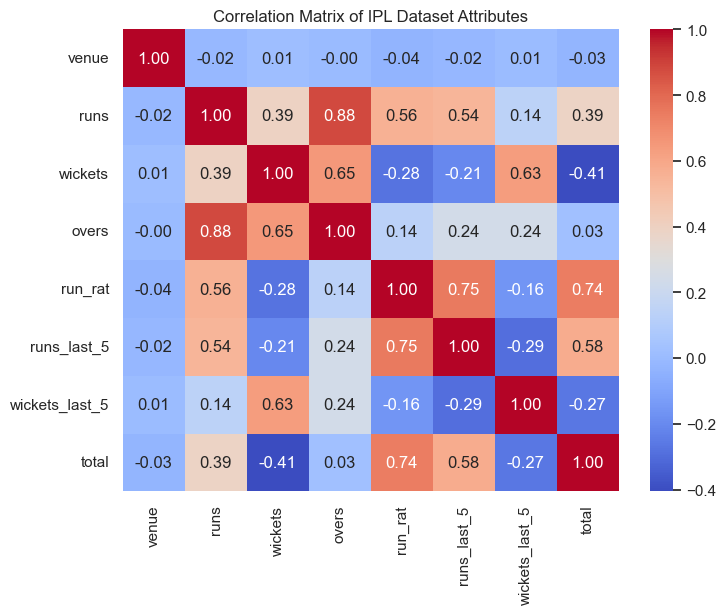

Attribute with highest correlation with 'total': run_rat
Correlation value: 0.74


In [44]:
corr_matrix = ipl_df[['venue','runs', 'wickets', 'overs','run_rat', 'runs_last_5', 'wickets_last_5', 'total']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of IPL Dataset Attributes')
plt.show()

total_corr = corr_matrix['total']

# Find the highest correlation with 'total'
highest_corr = total_corr.drop(labels='total')  # Drop the 'total' correlation with itself
max_corr_attr = highest_corr.idxmax()
max_corr_value = highest_corr.max()

print(f"Attribute with highest correlation with 'total': {max_corr_attr}")
print(f"Correlation value: {max_corr_value:.2f}")

In [45]:
ipl_df.head()

,bat_team,bowl_team,venue,runs,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
32,Kolkata Knight Riders,Royal Challengers Bengaluru,20,61,0,5.1,11.806452,59,0,222
33,Kolkata Knight Riders,Royal Challengers Bengaluru,20,61,1,5.2,11.437500,59,1,222
34,Kolkata Knight Riders,Royal Challengers Bengaluru,20,61,1,5.3,11.090909,59,1,222
35,Kolkata Knight Riders,Royal Challengers Bengaluru,20,61,1,5.4,10.764706,59,1,222
36,Kolkata Knight Riders,Royal Challengers Bengaluru,20,61,1,5.5,10.457143,58,1,222


In [46]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

#ColumnTransformer 
column_transformer = ColumnTransformer(
    transformers=[
        ('bat_team', OneHotEncoder(), ['bat_team']),
        ('bowl_team', OneHotEncoder(), ['bowl_team'])
    ],
    remainder='passthrough'
)

# Fit and transform the data using ColumnTransformer
transformed_data = column_transformer.fit_transform(ipl_df)
# Convert sparse matrix to dense if needed
if hasattr(transformed_data, 'toarray'):
    transformed_data = transformed_data.toarray()

# Convert to NumPy array
ipl_df = np.array(transformed_data)


In [47]:
ipl_df[0]

array([  0.        ,   0.        ,   0.        ,   0.        ,
         1.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   1.        ,   0.        ,
        20.        ,  61.        ,   0.        ,   5.1       ,
        11.80645161,  59.        ,   0.        , 222.        ])

In [48]:
cols = [
    'batting_team_Chennai Super Kings', 'batting_team_Delhi Capitals', 'batting_team_Gujarat Titans',
    'batting_team_Kings XI Punjab', 'batting_team_Kolkata Knight Riders', 'batting_team_Lucknow Super Giants',
    'batting_team_Mumbai Indians', 'batting_team_Rajasthan Royals', 'batting_team_Royal Challengers Bengaluru',
    'batting_team_Sunrisers Hyderabad', 'bowling_team_Chennai Super Kings', 'bowling_team_Delhi Capitals',
    'bowling_team_Gujarat Titans', 'bowling_team_Kings XI Punjab', 'bowling_team_Kolkata Knight Riders',
    'bowling_team_Lucknow Super Giants', 'bowling_team_Mumbai Indians', 'bowling_team_Rajasthan Royals',
    'bowling_team_Royal Challengers Bengaluru', 'bowling_team_Sunrisers Hyderabad','venue', 'runs', 'wickets', 'overs','run_rat',
    'runs_last_5', 'wickets_last_5', 'total'
]
df = pd.DataFrame(ipl_df, columns=cols)

In [49]:
df['runs_last_5'] = df['runs_last_5'].astype(int)
df['wickets_last_5'] = df['wickets_last_5'].astype(int)

In [50]:
df.head()

,batting_team_Chennai Super Kings,batting_team_Delhi Capitals,batting_team_Gujarat Titans,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Lucknow Super Giants,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bengaluru,batting_team_Sunrisers Hyderabad,...,bowling_team_Royal Challengers Bengaluru,bowling_team_Sunrisers Hyderabad,venue,runs,wickets,overs,run_rat,runs_last_5,wickets_last_5,total
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.0,61.0,0.0,5.1,11.806452,59,0,222.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.0,61.0,1.0,5.2,11.437500,59,1,222.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.0,61.0,1.0,5.3,11.090909,59,1,222.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.0,61.0,1.0,5.4,10.764706,59,1,222.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,20.0,61.0,1.0,5.5,10.457143,58,1,222.0


In [51]:
X = df.drop(['total'], axis=1)
y= df['total']

In [52]:
from sklearn.model_selection import train_test_split

# Split data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to NumPy arrays
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Print the shapes of the resulting sets
print(f"Training Set: {X_train.shape}")
print(f"Testing Set: {X_test.shape}")

Training Set: (68846, 27)
Testing Set: (17212, 27)


Running RandomizedSearchCV for Linear Regression...
Running RandomizedSearchCV for Lasso Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from RandomizedSearchCV: {'model__alpha': np.float64(0.6808361216819946)}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Running RandomizedSearchCV for Ridge Regression...
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters from RandomizedSearchCV: {'model__alpha': np.float64(3.0041806084099734)}
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 fol

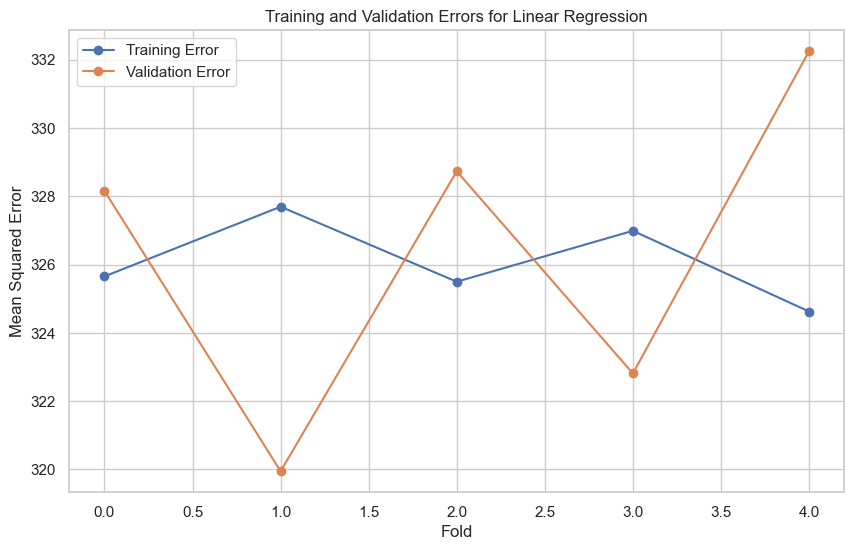

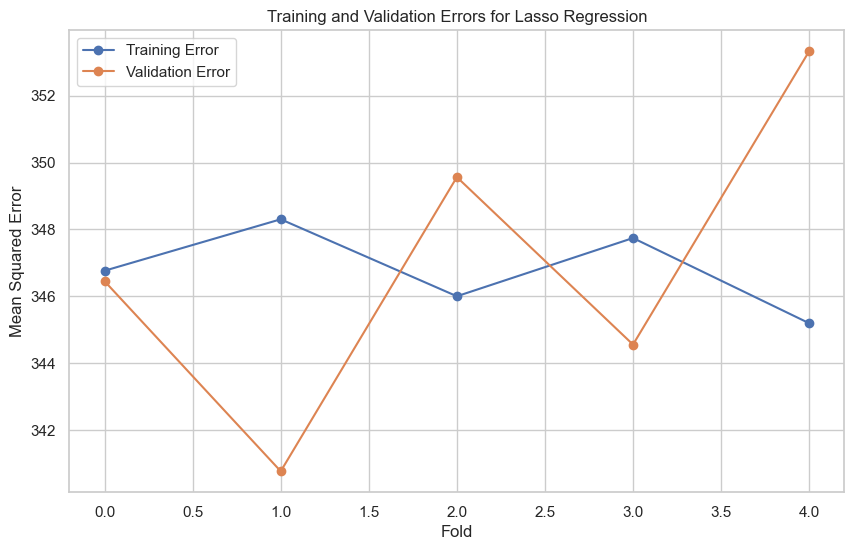

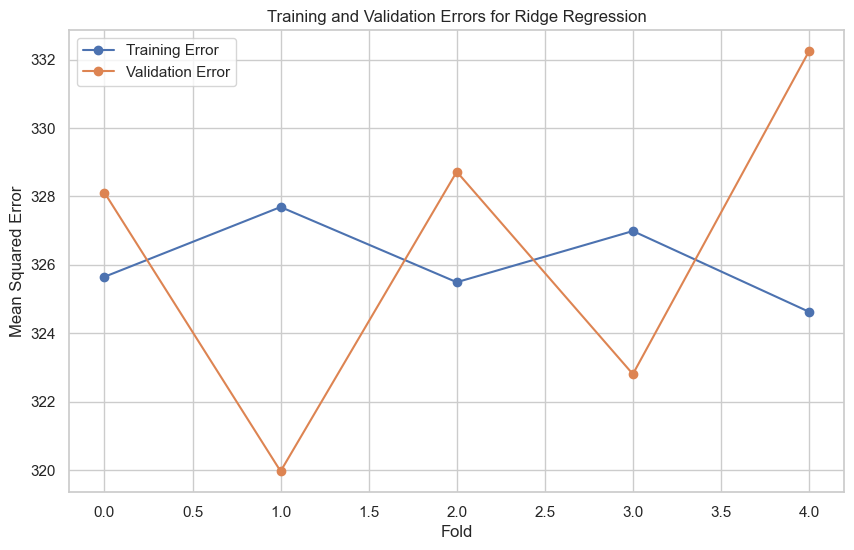

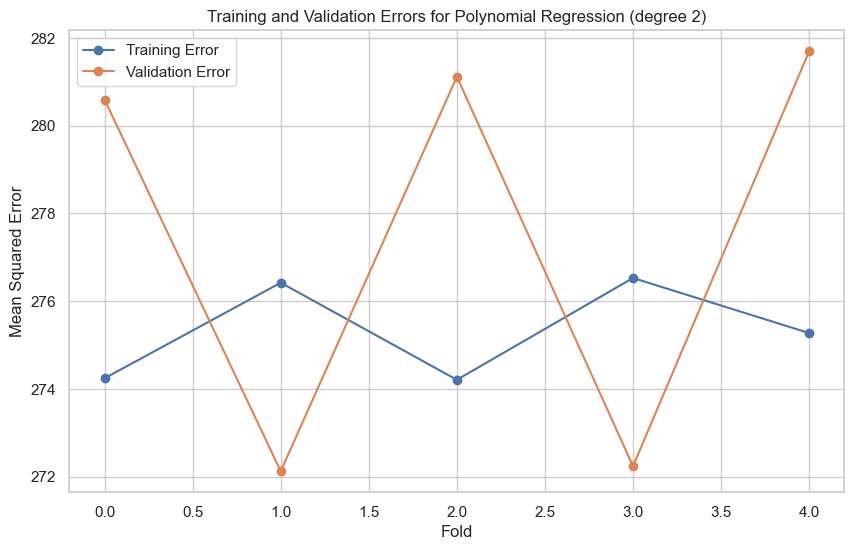

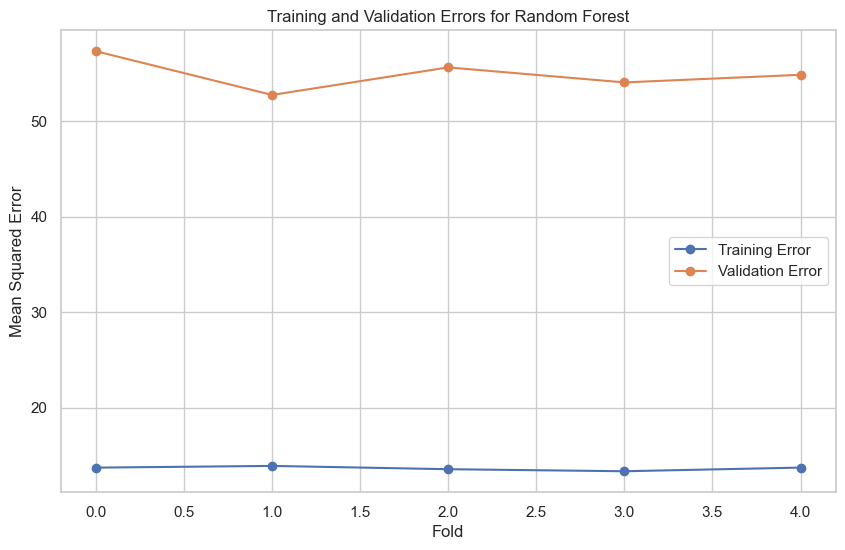

In [53]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from scipy.stats import randint, uniform
import numpy as np
import matplotlib.pyplot as plt

# Function to create a pipeline with Standard Scaler
def create_pipeline(model):
    return Pipeline(steps=[('scaler', StandardScaler()), ('model', model)])

# Polynomial Regression (degree 2) requires PolynomialFeatures before the linear model
def create_polynomial_pipeline(degree, model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('poly_features', PolynomialFeatures(degree=degree)), 
        ('model', model)
    ])

# Define pipelines
pipelines = {
    'Linear Regression': create_pipeline(LinearRegression()),
    'Lasso Regression': create_pipeline(Lasso(random_state=42)),
    'Ridge Regression': create_pipeline(Ridge(random_state=42)),
    'Polynomial Regression (degree 2)': create_polynomial_pipeline(2, LinearRegression()),
    'Random Forest': create_pipeline(RandomForestRegressor(random_state=42))
}

# Define parameter distributions
def create_param_dist(params):
    return {f'model__{key}': value for key, value in params.items()}

param_dist = {
    'Linear Regression': create_param_dist({}),  # No hyperparameters
    'Lasso Regression': create_param_dist({'alpha': uniform(0.1,10)}),
    'Ridge Regression': create_param_dist({'alpha': uniform(0.1,50)}),
    'Polynomial Regression (degree 2)': create_param_dist({}),  # No hyperparameters
    'Random Forest': {
        'model__n_estimators': randint(50, 200),
        'model__max_depth': randint(10, 50),
        'model__min_samples_split': randint(2, 11),
        'model__min_samples_leaf': randint(1, 5),
        'model__max_features': ['sqrt', 'log2'],
        'model__bootstrap': [True, False]
    }
}

kf = KFold(n_splits=5)

# Function to collect training and validation errors
def collect_errors(pipeline, X, y, kf):
    train_errors = []
    val_errors = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate errors
        y_train_pred = pipeline.predict(X_train_fold)
        y_val_pred = pipeline.predict(X_val_fold)
        
        train_errors.append(mean_squared_error(y_train_fold, y_train_pred))
        val_errors.append(mean_squared_error(y_val_fold, y_val_pred))
    
    return train_errors, val_errors

# Model selection and evaluation
results = {}
errors = {}

for name, pipeline in pipelines.items():
    print(f"Running RandomizedSearchCV for {name}...")
    
    # Check if there are hyperparameters to tune
    if param_dist[name]:
        # Perform Randomized Search
        randomized_search = RandomizedSearchCV(pipeline, param_distributions=param_dist[name], 
                                               n_iter=10, cv=kf, verbose=2, random_state=42, n_jobs=-1)
        randomized_search.fit(X_train, y_train)
        
        # Save the best parameters from RandomizedSearchCV
        best_params_randomized = randomized_search.best_params_
        print(f"Best parameters from RandomizedSearchCV: {best_params_randomized}")

        # Extract the best parameters for GridSearchCV
        param_grid = {key: [best_params_randomized[key]] for key in best_params_randomized}
        
        # Perform Grid Search
        grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5, verbose=2, n_jobs=-1)
        grid_search.fit(X_train, y_train)

        # Use grid_search for further evaluation
        best_estimator = grid_search
    else:
        # Fit the model directly
        pipeline.fit(X_train, y_train)
        best_estimator = pipeline

    # Collect training and validation errors
    train_errors, val_errors = collect_errors(best_estimator, X_train, y_train, kf)
    errors[name] = {'train': train_errors, 'val': val_errors}

    # Evaluate on training set
    y_train_pred = best_estimator.predict(X_train)
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_r2 = r2_score(y_train, y_train_pred)
    train_mae=mean_absolute_error(y_train, y_train_pred)

    # Evaluate on test set
    y_test_pred = best_estimator.predict(X_test)
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    test_mae=mean_absolute_error(y_test,y_test_pred)

    # Collect results
    results[name] = {
        'best_params_randomized': best_params_randomized if param_dist[name] else None,
        'best_params_grid': grid_search.best_params_ if param_dist[name] else None,
        'train_mse': train_mse,
        'train_r2': train_r2,
        'train_mae':train_mae,
        'best_cv_score_randomized': randomized_search.best_score_ if param_dist[name] else None,
        'best_cv_score_grid': grid_search.best_score_ if param_dist[name] else None,
        'test_mse': test_mse,
        'test_mae':test_mae,
        'test_r2': test_r2
    }

# Display results
for name, result in results.items():
    print(f"Model: {name}")
    print(f"  Best Parameters from Randomized Search: {result['best_params_randomized']}")
    print(f"  Best Parameters from Grid Search: {result['best_params_grid']}")
    print(f"----Evaluate on training set------- ")
    print(f"  Training MAE: {result['train_mae']}")
    print(f"  Training MSE: {result['train_mse']}")
    print(f"  Training R^2: {result['train_r2']}")
    print("\n")
    print(f"  Best CV Score from Randomized Search: {result['best_cv_score_randomized']}")
    print(f"  Best CV Score from Grid Search: {result['best_cv_score_grid']}")
    print(f"----Evaluate on test set------- ")
    print(f"  Test MAE: {result['test_mae']}")
    print(f"  Test MSE: {result['test_mse']}")
    print(f"  Test R^2: {result['test_r2']}")
    print("\n")
    
# Plot training and validation errors
for name, errs in errors.items():
    plt.figure(figsize=(10, 6))
    plt.plot(range(len(errs['train'])), errs['train'], label='Training Error', marker='o')
    plt.plot(range(len(errs['val'])), errs['val'], label='Validation Error', marker='o')
    plt.title(f'Training and Validation Errors for {name}')
    plt.xlabel('Fold')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

In [54]:
pipelines

{'Linear Regression': Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())]),
 'Lasso Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', Lasso(random_state=42))]),
 'Ridge Regression': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', Ridge(random_state=42))]),
 'Polynomial Regression (degree 2)': Pipeline(steps=[('scaler', StandardScaler()),
                 ('poly_features', PolynomialFeatures()),
                 ('model', LinearRegression())]),
 'Random Forest': Pipeline(steps=[('scaler', StandardScaler()),
                 ('model', RandomForestRegressor(random_state=42))])}

### Model: Linear Regression

-  Best Parameters from Randomized Search: None
-  Best Parameters from Grid Search: None
-  Training MAE: 13.418185571218357
-  Training MSE: 326.1474252821776
-  Training R^2: 0.635695448019683
-  Best CV Score from Randomized Search: None
-  Best CV Score from Grid Search: None
-  Test MAE: 13.541995016758285
-  Test MSE: 333.0509614753175
-  Test R^2: 0.6375665927362097


### Model: Lasso Regression

- Best Parameters from Randomized Search: {'model__alpha': 0.6808361216819946}
- Best Parameters from Grid Search: {'model__alpha': 0.6808361216819946}
- Training MAE: 13.913144099469262
- Training MSE: 346.8196646094646
- Training R^2: 0.6126046911938657
- Best CV Score from Randomized Search: 0.6124618939062887
- Best CV Score from Grid Search: 0.6135671505899072
- Test MAE: 14.065409992073825
- Test MSE: 354.3572148849678
- Test R^2: 0.6143806575115263


### Model: Ridge Regression

-  Best Parameters from Randomized Search: {'model__alpha': 3.0041806084099734}
-  Best Parameters from Grid Search: {'model__alpha': 3.0041806084099734}
- Training MAE: 13.4181333895447
-  Training MSE: 326.1495262014784
-  Training R^2: 0.6356931013064935
-  Best CV Score from Randomized Search: 0.6354265539503456
-  Best CV Score from Grid Search: 0.6364145041174799
- Test MAE: 13.541792061670279
-  Test MSE: 333.0441932387472
-  Test R^2: 0.6375739580806317


### Model: Polynomial Regression (degree 2)

-  Best Parameters from Randomized Search: None
-  Best Parameters from Grid Search: None
-  Training MAE: 12.35475576830898
-  Training MSE: 276.381640907099
-  Training R^2: 0.6912835053683695
-  Best CV Score from Randomized Search: None
-  Best CV Score from Grid Search: None
- Test MAE: 12.504474530850569
-  Test MSE: 283.6461245789241
-  Test R^2: 0.6913300266934442


### Model: Random Forest

-  Best Parameters from Randomized Search: {'model__bootstrap': False, 'model__max_depth': 33, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'model__n_estimators': 179}
-  Best Parameters from Grid Search: {'model__bootstrap': False, 'model__max_depth': 33, 'model__max_features': 'log2', 'model__min_samples_leaf': 2, 'model__min_samples_split': 7, 'model__n_estimators': 179}
- Training MAE: 2.7120445202778276
-  Training MSE: 21.965508901540698
-  Training R^2: 0.9754646694743271
-  Best CV Score from Randomized Search: 0.9386798571108187
-  Best CV Score from Grid Search: 0.9235124282802436
- Test MAE: 4.65544040227607
-  Test MSE: 56.71222291101052
-  Test R^2: 0.9382845072955467


## Random Forest
- Training error is consistently low and stable.
- Validation error is much higher than training error with some variation.
- Overfitting: The large gap between training and validation errors suggests overfitting, where the model performs well on training data but struggles on validation data.
- The model is overfitted.


## linear Regression
- training error stays relatively stable across all folds.But validation error fluctuated a lot
- Here training and validation errors are higher than other models. 
- This model is not robust enough for this data set.


## Lasso Regression:
- Training error is stable but slightly higher than Linear Regression.
- Validation error fluctuates more across folds than the training error.
- Lasso introduces L1 regularization, which shrinks some coefficients towards zero, effectively performing feature selection.
- Training and validation errors are relatively close, indicating the model isn't overfitting, but both errors are higher than Polynomial Regression.
- This suggests that Lasso is regularizing, but it may not be the best fit for this dataset, as it doesn't reduce the errors as effectively as Polynomial Regression.


## Ridge Regression:
- Training error is stable and very similar to Linear Regression, indicating that the L2 regularization effect is minimal.
- Validation error fluctuates across folds, but it tends to be more stable compared to Lasso Regression.
- Ridge applies L2 regularization, penalizing large coefficients to prevent overfitting, but its impact is not significant in this case.
- Training and validation errors are relatively close, indicating no overfitting, yet both errors are still higher than those of Polynomial Regression.
- While Ridge stabilizes performance, it doesn’t capture the complexity of the dataset as effectively as Polynomial Regression, indicating that the data may have non-linear patterns.



## Polynomial Regression :
- Validation error is less stable than training error.
- Although the validation fluctuates across folds. But overall validation error lower than linear regression.
- Both training and validation errrs are low compair to other model.And both training and validation error are close to each other.

### Here, We get polynomial regression of degree 2 as best model for generalization purpose.
Now We are trying to get more accuracy by making complex model by increesing degree.

Polynomial Regression (degree 3)
----Evaluate on train set------- 
Training MAE: 10.264689658349795
Training MSE: 196.4206846936612
Training R^2: 0.7805993731973159


----Evaluate on test set------- 
Test MAE: 10.517915825441552
Test MSE: 205.65769021621338
Test R^2: 0.7761987623008642


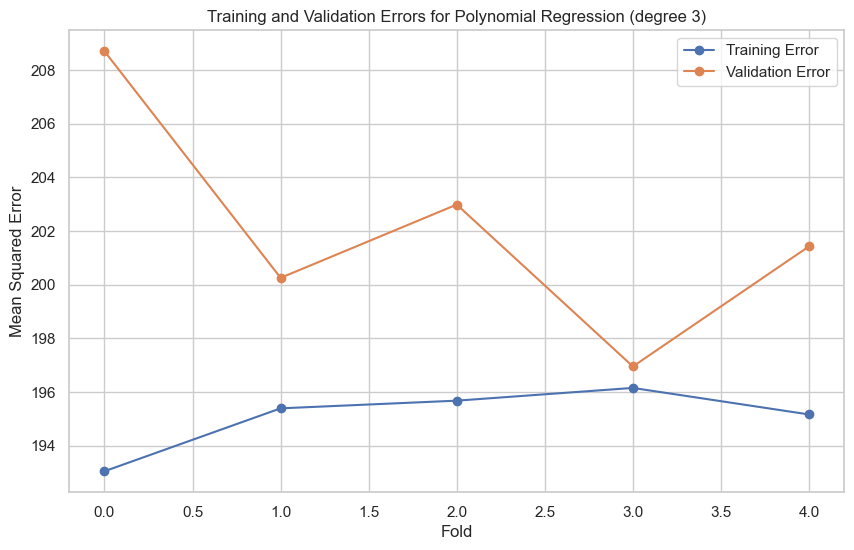

In [55]:
# Function to create a pipeline with Polynomial Features and Standard Scaler
def create_polynomial_pipeline(degree, model):
    return Pipeline(steps=[
        ('scaler', StandardScaler()), 
        ('poly_features', PolynomialFeatures(degree=degree)), 
        ('model', model)
    ])

# Define pipeline for Polynomial Regression with degree 3
pipeline = create_polynomial_pipeline(3, LinearRegression())

# Define KFold for cross-validation
kf = KFold(n_splits=5)

# Function to collect training and validation errors
def collect_errors(pipeline, X, y, kf):
    train_errors = []
    val_errors = []
    
    for train_index, val_index in kf.split(X):
        X_train_fold, X_val_fold = X[train_index], X[val_index]
        y_train_fold, y_val_fold = y[train_index], y[val_index]
        
        pipeline.fit(X_train_fold, y_train_fold)
        
        # Predict and calculate errors
        y_train_pred = pipeline.predict(X_train_fold)
        y_val_pred = pipeline.predict(X_val_fold)
        
        train_errors.append(mean_squared_error(y_train_fold, y_train_pred))
        val_errors.append(mean_squared_error(y_val_fold, y_val_pred))
    
    return train_errors, val_errors

# Fit the model
pipeline.fit(X_train, y_train)

# Collect training and validation errors
train_errors, val_errors = collect_errors(pipeline, X_train, y_train, kf)

# Evaluate on training set
y_train_pred = pipeline.predict(X_train)
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Evaluate on test set
y_test_pred = pipeline.predict(X_test)
test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print results
print("Polynomial Regression (degree 3)")
print(f"----Evaluate on train set------- ")
print(f"Training MAE: {train_mae}")
print(f"Training MSE: {train_mse}")
print(f"Training R^2: {train_r2}")
print("\n")
print(f"----Evaluate on test set------- ")
print(f"Test MAE: {test_mae}")
print(f"Test MSE: {test_mse}")
print(f"Test R^2: {test_r2}")

# Plot training and validation errors
plt.figure(figsize=(10, 6))
plt.plot(range(len(train_errors)), train_errors, label='Training Error', marker='o')
plt.plot(range(len(val_errors)), val_errors, label='Validation Error', marker='o')
plt.title('Training and Validation Errors for Polynomial Regression (degree 3)')
plt.xlabel('Fold')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.show()

In [56]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures(degree=3)),
                ('model', LinearRegression())])

- degree 3 captures more complex patterns in the training data, it likely leads to overfitting, as seen by the higher and fluctuating validation error. The performance of Polynomial Regression (degree 2) appears more stable and balanced between training and validation errors, making it a better choice in this case.

- Therefore, degree 2 is likely the more appropriate model for your dataset based on error stability and generalization.

### Also We were getting overfitting in model of random forest. Now we are trying to reduce it's validation error.
- max_depth (e.g., 3 or 4): Limits tree depth to reduce complexity and variance.
- min_samples_split (e.g., 10 or 20): Controls minimum samples needed for splitting, reducing over-complex trees.
- min_samples_leaf (e.g., 5 or 10): Sets minimum samples in leaves, reducing sensitivity to outliers.
- n_estimators: Too many trees may overfit; start with 100-200 and monitor.
- max_features (e.g., 'sqrt', 'log2'): Limits features for splits, reducing overfitting with feature subsets.

- reduce it's validation error but get low Accuracy


### Now, taking polynomial regression model of degree 2 as best model. And predicting values for test data. 

In [57]:
# Define and fit the final model
final_model = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Fit the model with training data
final_model.fit(X_train, y_train)

# Predict on the test set
y_test_pred = final_model.predict(X_test)

# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_test_pred
})
results_df = results_df.round().astype(int)

# Extract the linear regression model from the pipeline
linear_model = final_model.named_steps['linear_reg']

# Print the weights (coefficients)
print("Polynomial Coefficients (Weights):")
print(linear_model.coef_)
print("length of coef:",len(linear_model.coef_))
# Print the intercept
print("Intercept:",linear_model.intercept_)

Polynomial Coefficients (Weights):
[ 5.70861320e+07  1.17863237e+11 -1.75190828e+10 -3.30346878e+11
  1.03196041e+12 -4.22215911e+11 -9.61875718e+11  1.10436071e+12
  8.10456067e+11  2.80549107e+12  6.14331903e+12  2.65927164e+11
 -4.97199890e+12  1.15248333e+11 -4.20216331e+12 -8.96776866e+11
  4.78452089e+11 -4.53860136e+12 -5.59963333e+11 -3.90608231e+11
 -6.83546112e+11 -4.48420240e-01  6.04642398e+00 -8.62597239e+00
 -1.94959004e+00  1.77135938e+01  3.82222451e-01 -2.84477386e-01
  2.80709643e+12  2.86167575e+12  1.01374501e+12 -1.48346437e+12
 -6.00982352e+11  1.39708314e+12  2.31650736e+12  1.32042621e+12
  2.71835892e+12  4.79422160e+12  3.49840528e+12  6.52128360e+12
  2.30930168e+12 -2.03564566e+12 -3.75402338e+10  5.69966700e+12
 -2.63560336e+12 -3.74029727e+12 -3.61338284e+12 -4.37306628e+12
  4.25413357e+12  5.95682585e+11 -1.51641125e+12  7.02681078e+09
 -2.79090995e+11 -5.93493396e+11 -4.72216825e+11  3.93079057e+11
  3.35173795e+12  1.46796362e+12 -4.10456082e+11  1.019

In [58]:
final_model

Pipeline(steps=[('scaler', StandardScaler()),
                ('poly_features', PolynomialFeatures()),
                ('linear_reg', LinearRegression())])

In [59]:
# Display the DataFrame
results_df.head()

,Actual,Predicted
0,200,184
1,169,165
2,172,178
3,165,160
4,171,173


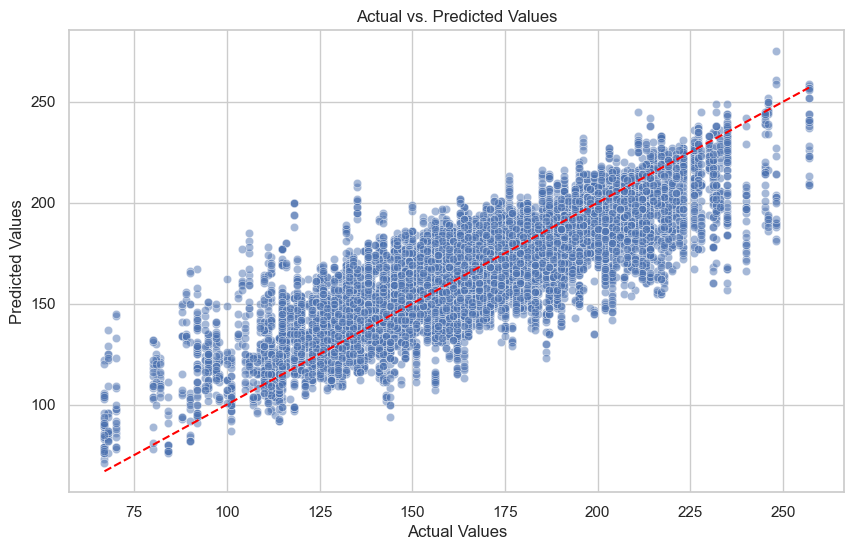

In [60]:
# Plot Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Actual'], results_df['Predicted'], alpha=0.5, edgecolors='w', linewidth=0.5)
plt.plot([results_df['Actual'].min(), results_df['Actual'].max()], 
         [results_df['Actual'].min(), results_df['Actual'].max()], 
         color='red', linestyle='--')  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()


In [61]:
# Calculate the correlation between actual and predicted values
correlation = results_df['Actual'].corr(results_df['Predicted'])

print(f"Correlation between Actual and Predicted values: {correlation:.4f}")

Correlation between Actual and Predicted values: 0.8322



### Good Fit:

- The predicted values (y-axis) are closely aligned with the actual values (x-axis) along the diagonal red line. This line represents the ideal scenario where the predicted values are exactly equal to the actual values.
Most of the points are distributed around this red line, indicating that the model has generally predicted the values well.

### Some Dispersion:

- While the model performs well overall, there is some dispersion, particularly for the lower and higher ranges of actual values. The data points are more scattered at the extremes (below 100 and above 225). This suggests that the model may not be as accurate for smaller or larger values and could be underestimating or overestimating predictions in those regions.

### Bias Towards Center:

- In the middle of the distribution (around 125–200), the points are more tightly packed around the diagonal line, showing that the model performs more reliably for this range of values.

### Conclusion:

- Overall, the polynomial regression model seems to fit the data quite well, especially for mid to higher actual values. The performance could be improved for lower actual values.

Also correlation between actual and predicted data point is 0.8323 which suggest model is good. But this is not only perameter we can rely on.

## Model performance on unseen data :

In [62]:
#get the labal encoding values of each venues
venue_name_list = venue_name.tolist()
venue_uniq_list = venue_uniq.tolist()

# Create the DataFrame from the lists
df_venues = pd.DataFrame({
    'Venue Name': venue_name_list,
    'Unique Number': venue_uniq_list
})

# Display the DataFrame
df_venues.head(40)

,Venue Name,Unique Number
0,"M Chinnaswamy Stadium, Bengaluru",20
1,"Punjab Cricket Association IS Bindra Stadium, ...",28
2,Feroz Shah Kotla,14
3,"Wankhede Stadium, Mumbai",39
4,Eden Gardens,12
5,Sawai Mansingh Stadium,31
6,"Rajiv Gandhi International Stadium, Uppal, Hyd...",29
7,"MA Chidambaram Stadium, Chepauk, Chennai",21
8,"Dr DY Patil Sports Academy, Mumbai",9
9,Newlands,26


##### Test : 1
- Bat team : Kolkata Knight Riders	[5]
- Bowl team : Chennai Super Kings	[1]
- Venue: MA Chidambaram Stadium, Chennai  [21]
- Runs : 66	
- Wickets: 4	
- overs : 8.3	
- run_rat : 7.764705882	
- runs_last_5 : 30	
- wickets_last_5 : 3	
- total : 137	

In [63]:
input_array = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 21, 66, 4, 8.3, 7.764705882, 30, 3]])
# Predict using the model
predicted = final_model.predict(input_array)
# Convert the result to a scalar and then to an integer
predicted_value = int(predicted[0])
print(f"Predicted score : {predicted_value}\nActual score: 137")

Predicted score : 149
Actual score: 137


##### Test : 2

- Bat team : Kings XI Punjab [4]
- Bowl team : Rajasthan Royals [8]
- Venue: 'Punjab Cricket Association IS Bindra Stadium, Mohali': [28]
- Runs : 47
- Wickets: 3
- overs : 	8.3
- run_rat : 5.529411765
- runs_last_5 : 20
- wickets_last_5 : 	2
- total : 	147

In [64]:
input_array = np.array([[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 28,47, 3, 8.3, 5.529411765,20,2]])
# Predict using the model
predicted = final_model.predict(input_array)
# Convert the result to a scalar and then to an integer
predicted_value = int(predicted[0])
print(f"Predicted score : {predicted_value}\nActual score: 147")

Predicted score : 142
Actual score: 147


##### Test : 3

- Bat team : Chennai Super Kings [1]
- Bowl team : Kings XI Punjab  [4]
- Venue: MA Chidambaram Stadium, Chennai [21]
- Runs : 81
- Wickets: 3
- overs :	12.1
- run_rat : 6.657534247
- runs_last_5 : 20
- wickets_last_5 : 	3
- total : 	162

In [65]:
input_array = np.array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 21,81, 3, 12.1, 6.657534247,20,3]])
# Predict using the model
predicted = final_model.predict(input_array)
# Convert the result to a scalar and then to an integer
predicted_value = int(predicted[0])
print(f"Predicted score : {predicted_value}\nActual score: 162")

Predicted score : 156
Actual score: 162


##### Test : 4

- Bat team : Sunrisers Hyderabad [10]
- Bowl team : Kolkata Knight Riders [5]
- Venue: Narendra Modi Stadium, Ahmedabad [24]
- Runs :  102
- Wickets: 5
- overs :	11.1
- run_rat : 9.134328358
- runs_last_5 : 55
- wickets_last_5 : 	1
- total : 	159

In [66]:
input_array = np.array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 24,102, 5,11.1, 9.134328358,55,1]])
# Predict using the model
predicted = final_model.predict(input_array)
# Convert the result to a scalar and then to an integer
predicted_value = int(predicted[0])
print(f"Predicted score : {predicted_value}\nActual score: 159")

Predicted score : 167
Actual score: 159
